# Support Vector Machines and kernelization

In [1]:
# Global imports and settings
from preamble import *
%matplotlib inline
plt.rcParams['savefig.dpi'] = 120 # Use 300 for PDF, 100 for slides
#InteractiveShell.ast_node_interactivity = "all"
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

## Linear SVMs
Revisited

### Linear models for Classification (recap)
Aims to find a (hyper)plane that separates the examples of each class.  
For binary classification (2 classes), we aim to fit the following function: 

$\hat{y} = w_0 * x_0 + w_1 * x_1 + ... + w_p * x_p + b > 0$  
    
When $\hat{y}<0$, predict class -1, otherwise predict class +1

### Support vector machines

- In several other linear models, we minimized (misclassification) error
- In SVMs, the optimization objective is to maximize the _margin_
- The __margin__ is the distance between the separating hyperplane and the _support vectors_
- The __support vectors__ are the training samples closest to the hyperplane
- Intuition: large margins generalize better, small margins may be prone to overfitting


![SVC Image](images/05_margin.png)  

#### Maximum margin

For now, we assume that the data is linearly separable.  

The _positive hyperplane_ is defined as:  

$b +  \mathbf{w^{T}x_+} = 1$

with $\mathbf{x_+}$ the positive support vectors.

Likewise, the _negative hyperplane_ is defined as:  

$b +  \mathbf{w^{T}x_-} = -1$

Substracting them yields:

$\mathbf{w^{T}(x_+ - x_-)} = 2$

We can normalize by the length of vector $w$, defined as  

$||w|| = \sqrt{\sum_{j=1}^{m} w_{j}^{2}}$

Yielding  

$\frac{\mathbf{w^{T}(x_+ - x_-)}}{||w||} = \frac{2}{||w||}$

The left side can be interpreted as the distance between to positive and negative hyperplane, which is the _margin_ that we want to maximize.

Hence, we want to maximize $\frac{2}{||w||}$ under the constraint that all samples are classified correctly:

$b +  \mathbf{w^{T}x^{(i)}} \geq 1 \,\,\, if \,\,\, y^{(i)} = 1$  
$b +  \mathbf{w^{T}x^{(i)}} \leq -1 \,\,\, if \,\,\, y^{(i)} = -1$  

i.e. all negative examples should fall on one side of the negative hyperplane and vice versa. Or:

$y^{(i)} (b +  \mathbf{w^{T}x^{(i)}}) \geq 1 \,\,\, \forall{i}$  

Maximizing $\frac{2}{||w||}$ can be done by minimizing $\frac{||w||^2}{2}$

This is a quadratic objective with linear constraints, and can hence be solved using quadratic programming, 
and more specifically with the _Lagrangian multiplier method_.

Geometric interpretation
- Assume 2 coefficients $w_1$ and $w_2$  (x and y in the image)
- Quadratic objective function $f = \frac{||w||^2}{2}$
- Constraint $y^{(i)} (b +  \mathbf{w^{T}x^{(i)}}) > 1 \,\,\, \forall{i}$
    - $g(w_1, w_2) = 1$ in the image
- Find the point (w_1, w_2) that satifies $g$ but maximizes $f$

![Langrangian multipliers](images/05_lagrangian_multipliers.png)

##### Primal and Dual formulations 

The Primal formulation of the Lagrangian objective function is:

$$min L_{P} = \frac{1}{2} ||\mathbf{w}||^2 - \sum_{i=1}^{l} a_i y_i (\mathbf{x_i} * \mathbf{w} + b) + \sum_{i=1}^{l} a_i $$

so that

$$ a_i \geq 0 $$ 
$$ \mathbf{w} = \sum_{i=1}^{l} a_i y_i \mathbf{x_i} $$
$$ \sum_{i=1}^{l} a_i y_i = 0 $$

with $l$ the number of training examples and $a$ the _dual variable_, which acts like a weight for each training example. We find the optimal set of $a$'s first, then the $w$'s can be easily computed.

It has a Dual formulation as follows:

$$min L_{D} (a_i) = \sum_{i=1}^{l} a_i - \frac{1}{2} \sum_{i,j=1}^{l} a_i a_j y_i y_j (\mathbf{x_i} . \mathbf{x_j}) $$

so that

$$ a_i \geq 0 $$  
$$ \sum_{i=1}^{l} a_i y_i = 0 $$

See 'Elements of Statistical Learning' for the complete derivation.

These are 2 very different optimization problems:
- In the primal, we optimize $p$ variables (number of features)
- In the dual, we optimize $n$ variables (number of instances)

Why are we considering this?  

- In some problems, we have more features than data points
- We can solve the problem by just computing the inner products of $\mathbf{x_i} . \mathbf{x_j}$, which will be important when we want to solve non-linearly separable cases.

In `sklearn`, the `LinearSVC` allows you to choose between the primal and the dual, while `SVC` always uses the dual

Making predictions

- Most of the $a_i$ will turn out to be *0*
- The training samples for which $a_i$ is not 0 are the _support vectors_ 
- Hence, the SVM model is completely defined by the support vectors and their coefficients

- Knowing the dual coefficients $a_i$ (of which $l$ are non-zero) we can find the weights $w$ for the maximal margin separating hyperplane:  
$$ \mathbf{w} = \sum_{i=1}^{l} a_i y_i \mathbf{x_i} $$
- Hence, we can classify a new sample $\mathbf{u}$ by looking at the sign of $\mathbf{w}*\mathbf{u}+b$


### SVMs and kNN
Remember, we will classify a new sample *u* by looking at the sign of:  
$f(x) = \mathbf{w}*\mathbf{u}+b$ = $\sum_{i=1}^{l} a_i y_i \mathbf{x_i}*\mathbf{u}+b$

_Weighted k-nearest neighbor_ is a generalization of the k-nearest neighbor classifier. It classifies points by looking at the sign of:  
$f(x) = \sum_{i=1}^{k} a_i y_i dist(x_i, u)$

Hence: SVM's predict exactly the same way as k-NN, only:
- They only consider the truly important points (the support vectors)
    - Thus _much_ faster
- The number of neighbors is the number of support vectors
- The distance function (a.k.a. the _kernel_) can be different

### SVMs in scikit-learn

- We can use the `svm.SVC` classifier
    - or `svm.SVR` for regression
- To build a linear SVM use `kernel=linear`
- It returns the following:
    - `support_vectors_`: the support vectors
    - `dual_coef_`: the dual coefficients $a$, i.e. the `weigths` of the support vectors
    - `coef_`: only for linear SVMs, the feature weights $w$

In [2]:
from sklearn import svm

# Linearly separable data
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# Fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# Get the support vectors and weights
print("Support vectors:")
print(clf.support_vectors_[:])
print("Coefficients:")
print(clf.dual_coef_[:])

Support vectors:
[[-0.681 -1.499]
 [-0.433 -2.783]
 [ 0.275  1.06 ]
 [ 0.198 -1.244]]
Coefficients:
[[-1.    -0.026  0.026  1.   ]]


SVM result. The circled samples are support vectors, together with their coefficients.

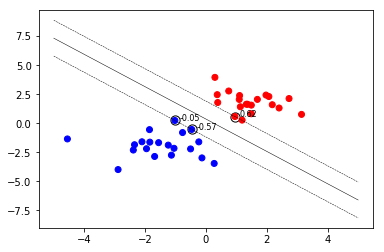

In [3]:
mglearn.plots.plot_svm_linear()

### Dealing with nonlinearly separable data

- If the data is not linearly separable, (hard) margin maximization becomes meaningless
    - The constraints would contradict
- We can allow for violatings of the margin constraint by introducing _slack variables_ $\xi^{(i)}$

$b +  \mathbf{w^{T}x^{(i)}} \geq 1 - \xi^{(i)}  \,\,\, if \,\,\, y^{(i)} = 1$  
$b +  \mathbf{w^{T}x^{(i)}} \leq -1 + \xi^{(i)} \,\,\, if \,\,\, y^{(i)} = -1$  

The new objective (to be minimized) becomes:

$\frac{||w||^2}{2} + C (\sum_i \xi^{(i)})$

- $C$ is a penalty for misclassification
    - Large C: large error penalties
    - Small C: less strict about violations (more regularization)

- This is known as the _soft margin_ SVM (or _large margin_ SVM)
    - Some support vectors are exactly on the margin hyperplane, with margin = 1
    - Others are margin violators, with margin < 1 and a positive slack variable: $\xi^{(i)} > 0$
        - If $\xi^{(i)} \geq 1$, they are misclassified

### C and regularization

- Hence, we can use C to control the size of the margin and tune the bias-variance trade-off
    - Small C: Increases bias, reduces variance, more underfitting
    - Large C: Reduces bias, increases variance, more overfitting
- The penalty term $C (\sum_i \xi^{(i)})$ acts as an L1 regularizer on the dual coefficients
    - Also known as hinge loss
    - This induces sparsity: large C values will set many dual coefficients to 0, hence fewer support vectors
    - Small C values will typically lead to more support vectors (more points fall within the margin)
    - Again, it depends on the data how flexible or strict you need to be
-  The _least squares SVM_ is a variant that does L2 regularization
    - Will have many more support vectors (with low weights)
    - In scikit-learn, this is only available for the `LinearSVC` classifier (`loss='squared_hinge'`)

Effect on linearly separable data

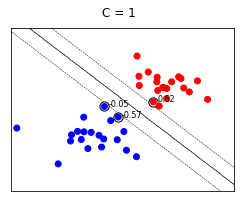

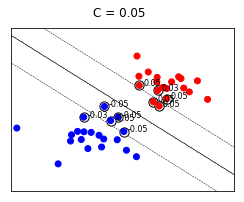

In [4]:
mglearn.plots.plot_svm_margins()

Effect on non-linearly separable data

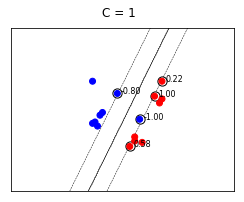

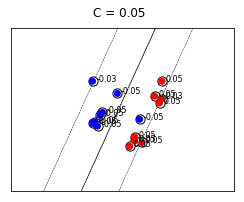

In [5]:
mglearn.plots.plot_svm_margins_nonlin()

#### Hinge loss vs zero-one loss

We are trying to:
- Maximize the margin
- Minimize the sum of margin violations

Why not maximize the margin and minimize the number of misclassifications (zero-one loss)
- Turns out that the corresponding objective function is not convex, NP-hard

The best convex relation is hinge loss: L(γ) = max{0, 1 − γ}    
It measures the margin violation $\xi_i$.

![Hinge](images/05_hinge.png)  

#### Other loss functions

It is possible to use generalize SVMs by training them with other loss functions and gradient descent as the optimizer

See the `SGDCLassifier`
-  `SGDCLassifier(loss='hinge')` will act like an SVM

![Hinge](images/05_loss.png)  

## Kernelized Support Vector Machines

* Linear models work well in high dimensional spaces.
* You can _create_ additional dimensions yourself.
* Let's start with an example.

Our linear model doesn't fit the data well

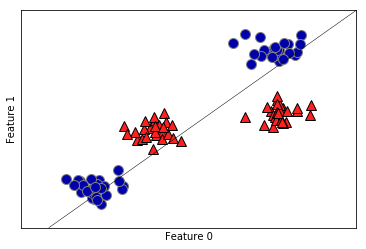

In [6]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import LinearSVC
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

We can add a new feature by taking the squares of feature1 values

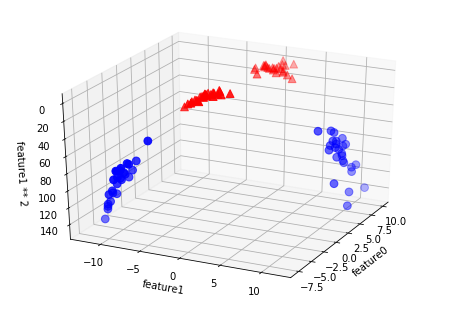

In [7]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2");

Now we can fit a linear model

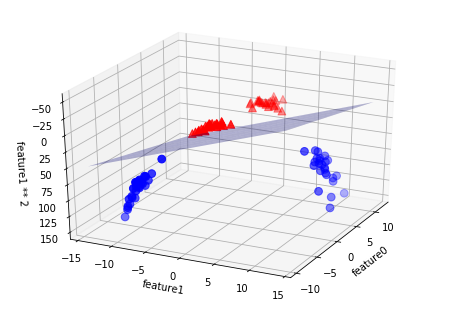

In [8]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2");

As a function of the original features, the linear SVM model is not actually linear anymore, but more of an ellipse

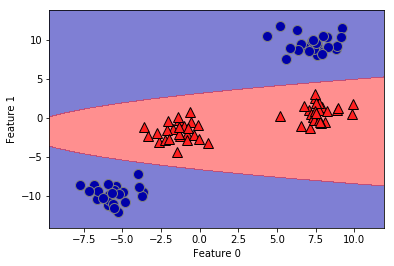

In [9]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1"); 

### Kernels

A (Mercer) Kernel on a space X is a (similarity) function  

$k: X \times X \rightarrow \mathbb{R}$

Of two arguments with the properties: 

- Symmetry: $k(x_1,x_2) = k(x_2,x_1) \,\,\, \forall x_1,x_2 \in X$
- Positive definite: for each finite subset of data points ${x_1,...,x_n}$, the kernel Gram matrix is positive semi-definite

Kernel matrix = $K \in \mathbb{R}^{n \times n}$ with $K_{ij} = k(x_i,x_j)$

What is this good for?

Mercer's Theorem states that  
- there exists a Hilbert space $\mathcal{H}$ of continuous functions $X \rightarrow \mathbb{R}$
    - basically, a possibly infinite-dimensional vector space with inner product where all operations are meaningful
- and a continuous "feature map" $\phi: X \rightarrow \mathcal{H}$
- so that the kernel computes the inner product of the features $k(x_1,x_2)=⟨\phi(x_1),\phi(x_2)⟩$

Hence, a kernel can be thought of as a 'shortcut' computation for the 2-step procedure feature map + inner product
- we don't need to construct a space of all polynomials of all features, we can define a kernel that returns the similarity between any two points by simply computing an inner product

#### Kernels: examples

- The inner product is a kernel. The standard inner product is the __linear kernel__:  
$k(x_1,x_2) = x_1^T x_2$

- Kernels can be constructed from other kernels $k_1$ and $k_2$:
    - For $\lambda \geq 0, \lambda . k_1$ is a kernel
    - $k_1 + k_2$ is a kernel
    - $k_1 . k_2$ is a kernel (thus also $k_1^n$)
- This allows to construct the __polynomial kernel__:  
$k(x_1,x_2) = (x_1^T x_2 + b)^d$, for $b \geq 0$ and $d \in \mathbb{N}$ 

- The 'radial base fucntion' (or __Gaussian__) kernel is defined as:  
$k(x_1,x_2) = exp(-\gamma ||x_1 - x_2||^2)$, for $\gamma \geq 0$ 

![gamma](images/05_gaussian_curves.png)

#### The Kernel Trick

* Adding nonlinear features can make linear models much more powerful
* Often we don’t know which features to add, and adding many features might make computation very expensive
* Mathematical trick (_kernel trick_) allows us to directly compute distances (scalar products) in the high dimensional space
    * We can search for the nearest support vector in the high dimensional space
* A _kernel function_ is a distance (similarity) function with special properties for which this trick is possible
    * Polynomial kernel: computes all polynomials up to a certain degree of the original features
    * Gaussian kernel, or radial basis function (RBF): considers all possible polynomials of all degrees
        * Infinite high dimensional space (Hilbert space), where the importance of the features decreases for higher degrees

### The kernel trick: intuition

- There exist many feature maps (and hence Hilbert spaces) for the same kernel, but they are all equivalent
- The Reproducing Kernel Hilbert Space (RKHS) has feature map  
$\phi: X \rightarrow C(X); x \rightarrow k(x,·)$
Where C is the space of continuous functions $X \rightarrow \mathbb{R}$
- Thus, an input $x \in X$ is mapped to the basis function $\phi(x) = k(x,·)$
    - For every point, the mappings are continuous functions $k(x,·)$
- Kernel computes ⟨k(x1,·),k(x2,·)⟩=k(x1,x2)

Example: Gaussian kernel, 2 points (green and red)
- Each point generates a function, the inner product is where they intersect
- The closer the points are, the more similar they are
![gamma](images/05_kernel_map.png)

Comparing the decision boundaries:

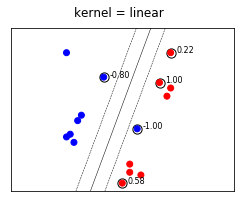

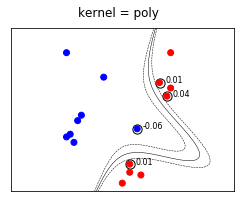

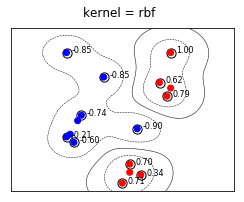

In [10]:
mglearn.plots.plot_svm_kernels()

### Local vs Global kernels
* With a linear or polynomial kernel, one support vector can affect the whole model space
    - These are called _global kernels_
* The RBF kernel only affects the region around the support vector (depending on how wide it is)
    - This a called a _local_ kernel
    - Can capture local abnormalities that a global kernel can't
    - Also overfits easily if the kernels are very narrow 

### Understanding SVMs

To make a prediction for a new point, the distance to each of the support vectors is measured.

* The weight of each support vector is stored in the ` dual_coef_` attribute of SVC
* The distance between data points is measured by the kernel
    * Gaussian kernel: $krbf(x_1, x_2) = \exp(\gamma ||x_1 - x_2||^2)$
        * $\gamma$ controls the width of the kernel and can be tuned

Given the support vectors, their weigths, and the kernel, we can plot the decision boundary

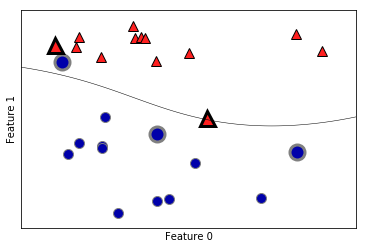

In [11]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)                                                
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# plot data
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

### Tuning SVM parameters
Several important parameters:

* gamma ((inverse) kernel width): high values means that points are further apart
    * High values mean narrow Gaussians, i.e. the influence of one point is very small
        * You need many support vectors
    * Leads to complex decision boundaries, overfitting
* C (our linear regularizer): 'cost' of misclassifying training examples
    * High C: force SVM to classify more examples correctly 
        * Requires more support vectors, thus complex decision boundaries
* For polynomial kernels, the _degree_ (exponent) defines the complexity of the models

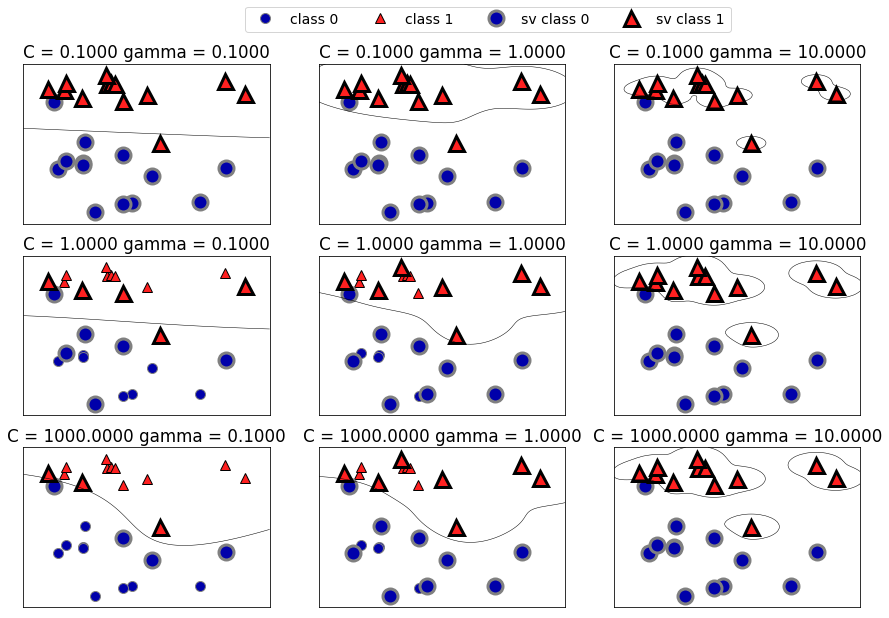

In [12]:
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2));

* Low gamma (left): wide Gaussians, very smooth decision boundaries
* High gamma (right): narrow Gaussians, boundaries focus on single points (high complexity)
* Low C (top): each support vector has very limited influence: many support vectores, almost linear decision boundary
* High C (bottom): Stronger influence, decision boundary bends to every support vector

Kernel overview

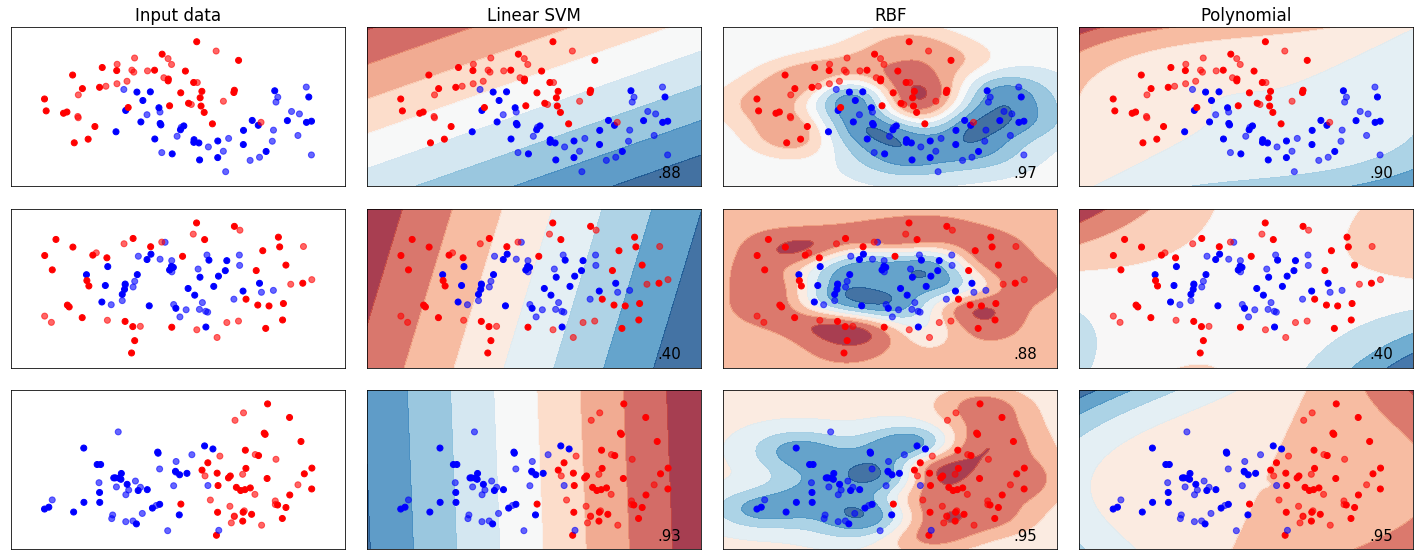

In [13]:
import plot_classifiers
names = ["Linear SVM", "RBF", "Polynomial"]

classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    SVC(kernel="poly", degree=3, C=0.1)
    ]
 
plot_classifiers.plot_classifiers(names, classifiers, figuresize=(20,8)) 

### Preprocessing Data for SVMs
* SVMs are very sensitive to hyperparameter settings
* They expect all features to be approximately on the same scale
* Data point similarity (e.g. RBF kernel) is computed the same way in all dimensions
* If some dimension is scaled differently, it will have a much larger/smaller impact

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test))) 

Accuracy on training set: 1.00
Accuracy on test set: 0.63


* We can scale all features between 0 and 1    
    * E.g. use `sklearn.preprocessing.MinMaxScaler`
* Remember, we must now apply the SAME transformation on the test set
    * 'Learn' the minima/maxima of training data
    * Apply them on the training and test splits separately
* sklearn offers `pipelines` which make this easier
    * Wrapper around series of operators

In [15]:
from sklearn.preprocessing import MinMaxScaler

# rescale data:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test))) 

Accuracy on training set: 0.948
Accuracy on test set: 0.951


Much better results, but they can still be tuned further

In [16]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


### Strengths, weaknesses and parameters

* SVMs allow complex decision boundaries, even with few features. 
* Work well on both low- and high-dimensional data

* Don't scale very well to large datasets (>100000)
* Require careful preprocessing of the data and tuning of the parameters. 
* SVM models are hard to inspect

Important parameters:
* regularization parameter _C_
* choice of the kernel and kernel-specific parameters
    * Typically string correlation with _C_